# Parametric Density Estimation

1.   List item
2.   List item


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [3]:
sample.mean()

49.90866402712961

(array([  3.,  12.,  24.,  36.,  52.,  70.,  96., 107., 118., 117., 117.,
         92.,  61.,  46.,  31.,  11.,   3.,   2.,   2.]),
 array([35.42566448, 37.07543071, 38.72519695, 40.37496319, 42.02472942,
        43.67449566, 45.32426189, 46.97402813, 48.62379437, 50.2735606 ,
        51.92332684, 53.57309308, 55.22285931, 56.87262555, 58.52239179,
        60.17215802, 61.82192426, 63.47169049, 65.12145673, 66.77122297]),
 <BarContainer object of 19 artists>)

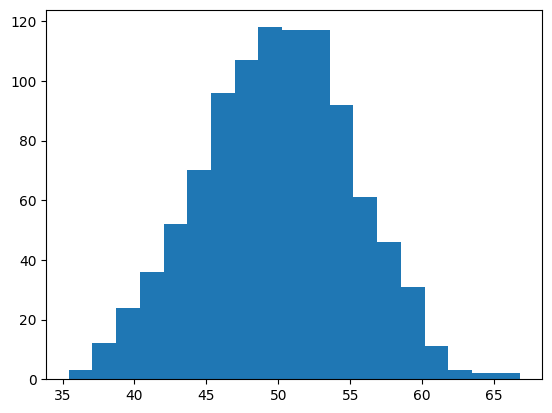

In [5]:
# plot histogram to understand the distribution of data
plt.hist(sample, bins=19)

In [6]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()


In [7]:
# fit the distribution with the above parameters
from scipy.stats import norm
dist = norm(60, 12)

In [8]:
values = np.linspace(sample.min(),sample.max(),100)

In [9]:
sample.max()

66.77122296651551

In [10]:
probabilities = [dist.pdf(value) for value in values]

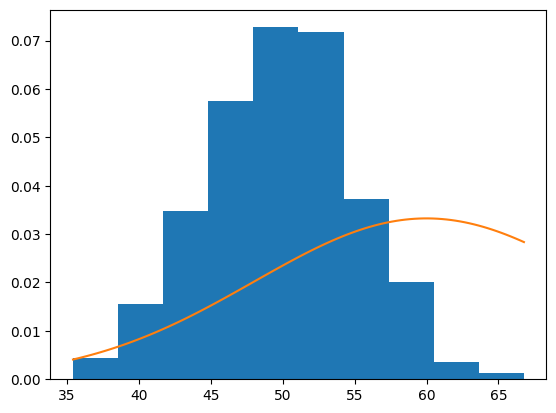

In [11]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

C:\Users\Engineer\AppData\Local\Temp\ipykernel_23396\1482356190.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)


<Axes: ylabel='Density'>

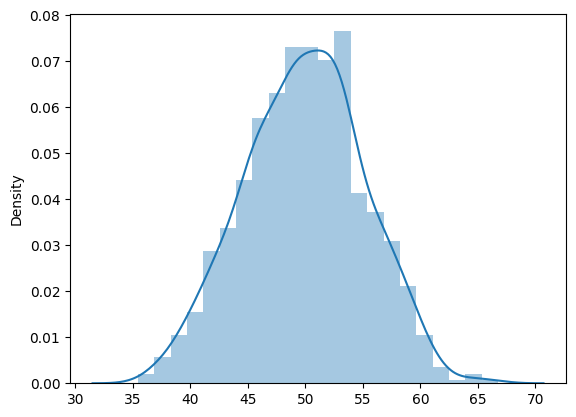

In [12]:
import seaborn as sns
sns.distplot(sample)

In [13]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [14]:
sample

array([29.82015067, 17.63017944, 18.03513634, 28.73935193, 26.76731819,
       14.83156352, 12.71852984, 20.03298446, 23.08165499, 22.63824775,
       19.01903898, 18.65806227, 21.20179027, 21.85783442, 25.75010024,
       18.8296483 , 18.28305426, 19.40051424, 18.010528  , 17.80238239,
       16.09983369, 27.04137176, 17.73140089, 16.31181592, 29.72891559,
       25.68958752, 19.94094625, 13.76955865, 28.47701262, 24.55616544,
       20.40056791, 13.04541246, 23.60691215, 19.36312002, 20.14590964,
       22.49504405, 16.85735365, 15.33644779, 23.52612463, 17.9984563 ,
       16.099296  , 12.21594274, 13.5778875 , 15.84298088, 13.0135421 ,
       19.77998493, 23.58340164, 26.76738152, 19.42040629, 22.07996266,
       15.78946634, 29.09802642, 18.58841755, 22.52822355, 14.6987278 ,
       15.21569584, 23.74498569, 22.27662946, 18.93044357, 17.11720194,
       15.82960007, 18.821207  , 22.49680359, 20.37525249, 20.5866613 ,
       26.45329069, 25.45197524, 19.72987368,  7.53814225, 34.30

(array([ 3.,  1.,  3.,  1.,  3., 10., 12.,  7., 19., 19., 18., 18., 23.,
        26., 18., 30., 18., 17., 11., 11., 10.,  9., 13., 12., 18., 17.,
        18., 27., 20., 42., 52., 48., 49., 62., 57., 54., 54., 40., 28.,
        23., 21., 21.,  8.,  9.,  9.,  6.,  2.,  1.,  0.,  2.]),
 array([ 7.01112988,  7.98843849,  8.96574711,  9.94305572, 10.92036433,
        11.89767294, 12.87498156, 13.85229017, 14.82959878, 15.8069074 ,
        16.78421601, 17.76152462, 18.73883323, 19.71614185, 20.69345046,
        21.67075907, 22.64806768, 23.6253763 , 24.60268491, 25.57999352,
        26.55730214, 27.53461075, 28.51191936, 29.48922797, 30.46653659,
        31.4438452 , 32.42115381, 33.39846243, 34.37577104, 35.35307965,
        36.33038826, 37.30769688, 38.28500549, 39.2623141 , 40.23962272,
        41.21693133, 42.19423994, 43.17154855, 44.14885717, 45.12616578,
        46.10347439, 47.080783  , 48.05809162, 49.03540023, 50.01270884,
        50.99001746, 51.96732607, 52.94463468, 53.92194329,

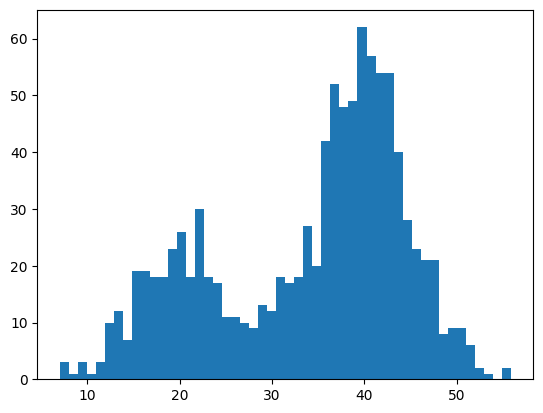

In [15]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [16]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [17]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))